In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Suicide rate

In [ ]:
DATA_PATH = '/content/drive/My Drive/Data Mining I/Project/Initial data exploration/data_suicide_rate.csv' # Sergi
df = pd.read_csv(DATA_PATH)

In [ ]:
df = df[['Location', 'Period', 'Dim1ValueCode', 'FactValueNumeric']]

In [ ]:
df.head()

,Location,Period,Dim1ValueCode,FactValueNumeric
0,Antigua and Barbuda,2019,MLE,0.00
1,Barbados,2019,FMLE,0.16
2,Barbados,2019,BTSX,0.31
3,Antigua and Barbuda,2019,BTSX,0.32
4,Barbados,2019,MLE,0.49


In [ ]:
df_2019 = df.loc[df['Period']==2019]
df_2019 = df_2019.drop('Period', axis=1)

In [ ]:
df = df_2019.loc[(df_2019['Dim1ValueCode']=='MLE') | (df_2019['Dim1ValueCode']=='FMLE')]
df = df.rename(columns={'Location': 'country', 'Dim1ValueCode': 'gender', 'FactValueNumeric': 'suicide rate'})
df_suicide_by_gender2 = df
df_suicide_by_gender2

,country,gender,suicide rate
0,Antigua and Barbuda,MLE,0.00
1,Barbados,FMLE,0.16
4,Barbados,MLE,0.49
5,Grenada,MLE,0.53
6,Antigua and Barbuda,FMLE,0.60
...,...,...,...
533,Turkmenistan,MLE,9.41
534,Kiribati,FMLE,9.45
539,Bolivia (Plurinational State of),MLE,9.60
545,South Africa,FMLE,9.83


In [ ]:
df_both = df_2019.loc[df_2019['Dim1ValueCode']=='BTSX']
df_both = df_both[['Location', 'FactValueNumeric']]
df_both = df_both.sort_values(by ='FactValueNumeric', ascending=False)
df_both = df_both.rename(columns={'Location': 'country', 'FactValueNumeric': 'both suicide rate'})
df_both = df_both.set_index('country')

In [ ]:
df_male = df_2019.loc[df_2019['Dim1ValueCode']=='MLE']
df_male = df_male[['Location', 'FactValueNumeric']]
df_male = df_male.sort_values(by ='FactValueNumeric', ascending=False)
df_male = df_male.rename(columns={'Location': 'country', 'FactValueNumeric': 'male suicide rate'})
df_male = df_male.set_index('country')

In [ ]:
df_female = df_2019.loc[df_2019['Dim1ValueCode']=='FMLE']
df_female = df_female[['Location', 'FactValueNumeric']]
df_female = df_female.sort_values(by ='FactValueNumeric', ascending=False)
df_female = df_female.rename(columns={'Location': 'country', 'FactValueNumeric': 'female suicide rate'})
df_female = df_female.set_index('country')

In [ ]:
df_plot = pd.concat([df_both, df_male, df_female], axis=1) # concatenate along columns axis
df_plot_top20 = df_plot[:20]

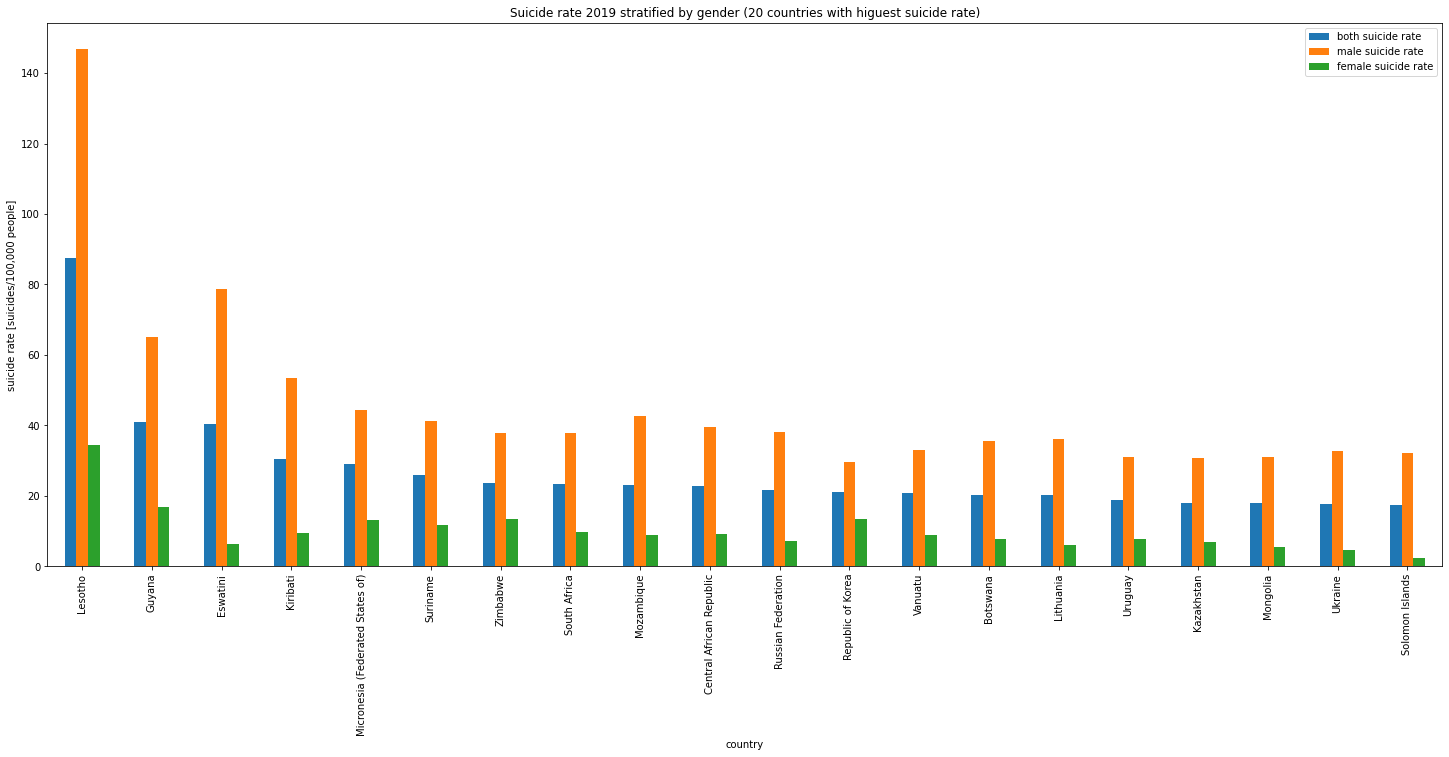

In [ ]:
df_plot_top20.plot.bar(figsize=(25, 10))
plt.title('Suicide rate 2019 stratified by gender (20 countries with higuest suicide rate)')
plt.xlabel('country')
plt.ylabel('suicide rate [suicides/100,000 people]')
plt.show()

In [ ]:
df_plot_last20 = df_plot[-20:]

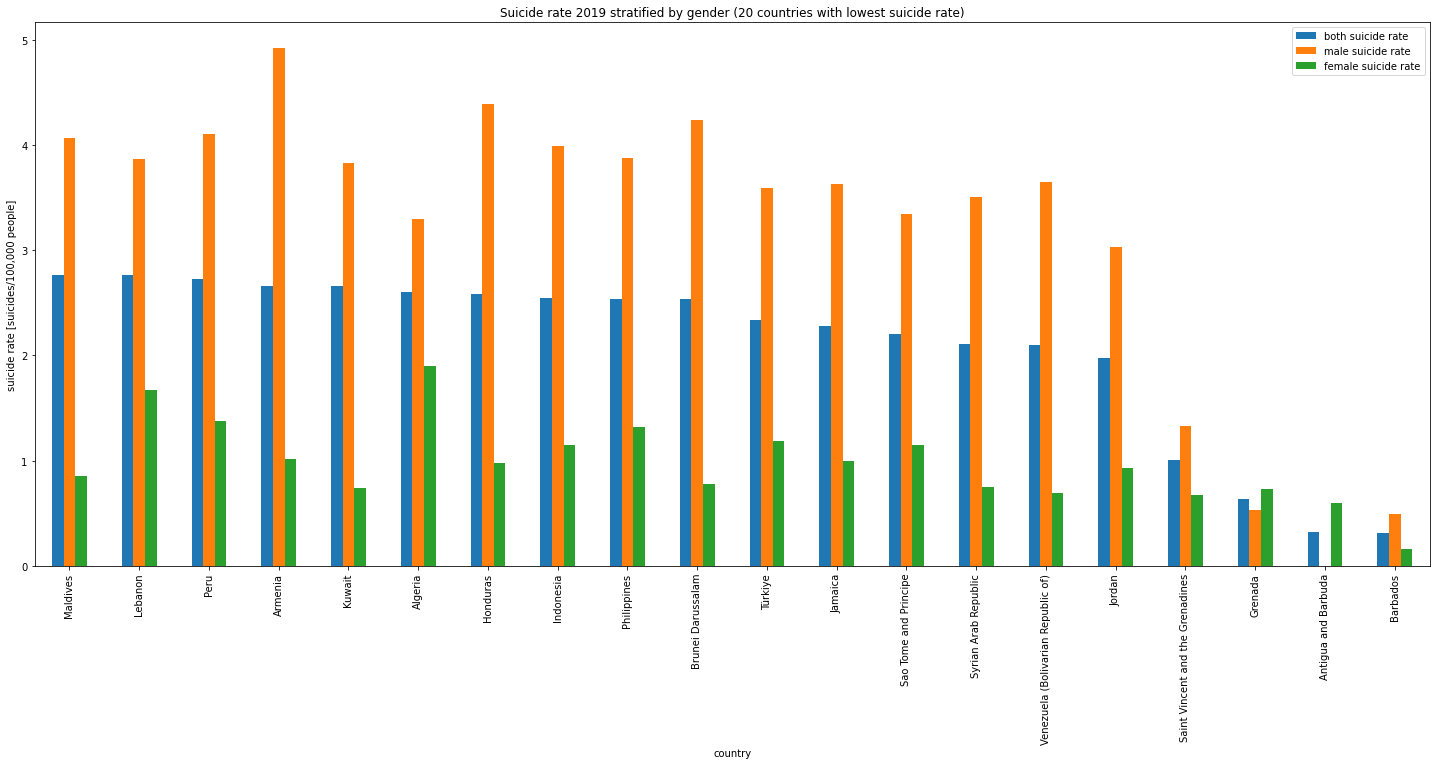

In [ ]:
df_plot_last20.plot.bar(figsize=(25, 10))
plt.title('Suicide rate 2019 stratified by gender (20 countries with lowest suicide rate)')
plt.xlabel('country')
plt.ylabel('suicide rate [suicides/100,000 people]')
plt.show()

In [ ]:
df_suicide_by_gender1 = df_plot.copy()
df_suicide_by_gender1

,both suicide rate,male suicide rate,female suicide rate
country,,,
Lesotho,87.48,146.90,34.56
Guyana,40.85,64.97,16.96
Eswatini,40.46,78.67,6.41
Kiribati,30.56,53.56,9.45
Micronesia (Federated States of),28.99,44.32,13.21
...,...,...,...
Jordan,1.98,3.03,0.93
Saint Vincent and the Grenadines,1.01,1.33,0.67
Grenada,0.64,0.53,0.73


#Air pollution

In [ ]:
DATA_PATH = '/content/drive/My Drive/Data Mining I/Project/Initial data exploration/pollution.csv' # Sergi
df = pd.read_csv(DATA_PATH)

In [ ]:
df = df[['Location', 'Period', 'Dim1', 'FactValueNumeric']]

In [ ]:
df = df.loc[df['Dim1']=='Total']

In [ ]:
df_2016 = df.loc[df['Period']==2016]

In [ ]:
df_2016.head()

,Location,Period,Dim1,FactValueNumeric
1,Luxembourg,2016,Total,10.02
2,San Marino,2016,Total,10.06
5,Switzerland,2016,Total,10.11
7,Marshall Islands,2016,Total,10.20
12,United Kingdom of Great Britain and Northern I...,2016,Total,10.33


In [ ]:
df_plot = df_2016.drop(['Period', 'Dim1'], axis=1)

In [ ]:
df_plot = df_plot.rename(columns={'Location': 'country', 'FactValueNumeric': 'air pollution'})

In [ ]:
df_pollution_male = df_plot.copy()
df_pollution_female = df_plot.copy()
df_pollution_male['gender'] = ['MLE']*len(df_pollution_male)
df_pollution_female['gender'] = ['FMLE']*len(df_pollution_female)
df_pollution2 = pd.concat([df_pollution_male, df_pollution_female], axis=0)
df_pollution2

,country,air pollution,gender
1,Luxembourg,10.02,MLE
2,San Marino,10.06,MLE
5,Switzerland,10.11,MLE
7,Marshall Islands,10.20,MLE
12,United Kingdom of Great Britain and Northern I...,10.33,MLE
...,...,...,...
566,Saint Kitts and Nevis,9.73,FMLE
568,Russian Federation,9.80,FMLE
569,Denmark,9.85,FMLE
572,Uruguay,9.95,FMLE


In [ ]:
df_plot = df_plot.set_index('country')
df_plot = df_plot.sort_values(by ='air pollution', ascending=False)

In [ ]:
df_plot_top100 = df_plot[:100]

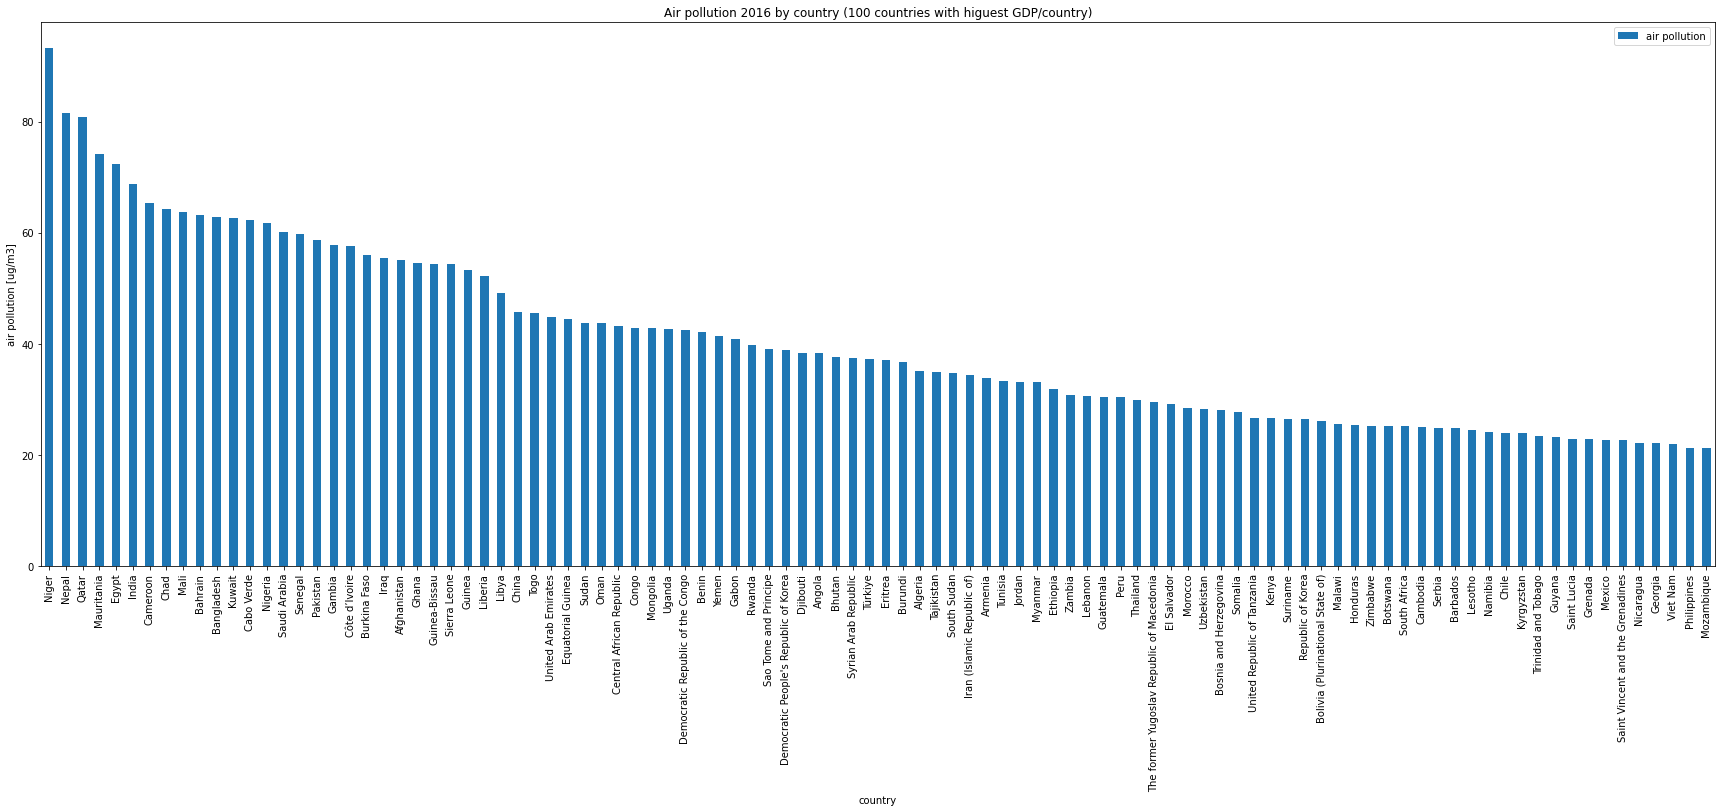

In [ ]:
df_plot_top100.plot.bar(figsize=(30, 10))
plt.title('Air pollution 2016 by country (100 countries with higuest GDP/country)')
plt.xlabel('country')
plt.ylabel('air pollution [ug/m3]')
plt.show()

In [ ]:
df_pollution1 = df_plot
df_pollution1

,air pollution
country,
Niger,93.18
Nepal,81.57
Qatar,80.80
Mauritania,74.13
Egypt,72.31
...,...
Estonia,6.41
Canada,6.41
Iceland,5.81


#Alcohol consumption

In [ ]:
DATA_PATH = '/content/drive/My Drive/Data Mining I/Project/Initial data exploration/alcohol.csv' # Sergi
df = pd.read_csv(DATA_PATH)

In [ ]:
df = df[['Location', 'Period', 'Dim1ValueCode', 'FactValueNumeric']]

In [ ]:
df_2019 = df.loc[df['Period']==2019]
df_2019 = df_2019.drop('Period', axis=1)

In [ ]:
df = df_2019.loc[(df_2019['Dim1ValueCode']=='MLE') | (df_2019['Dim1ValueCode']=='FMLE')]
df = df.rename(columns={'Location': 'country', 'Dim1ValueCode': 'gender', 'FactValueNumeric': 'alcohol consumption'})
df_alcohol2 = df
df_alcohol2

,country,gender,alcohol consumption
1,Bangladesh,FMLE,0.00
2,Bangladesh,MLE,0.00
4,Kuwait,FMLE,0.00
5,Kuwait,MLE,0.00
7,Mauritania,FMLE,0.00
...,...,...,...
551,Guinea-Bissau,MLE,9.32
552,China,MLE,9.37
558,Equatorial Guinea,MLE,9.63
560,Nigeria,MLE,9.84


In [ ]:
df_both = df_2019.loc[df_2019['Dim1ValueCode']=='BTSX']
df_both = df_both[['Location', 'FactValueNumeric']]
df_both = df_both.sort_values(by ='FactValueNumeric', ascending=False)
df_both = df_both.rename(columns={'Location': 'country', 'FactValueNumeric': 'both alcohol consumption'})
df_both = df_both.set_index('country')

In [ ]:
df_male = df_2019.loc[df_2019['Dim1ValueCode']=='MLE']
df_male = df_male[['Location', 'FactValueNumeric']]
df_male = df_male.sort_values(by ='FactValueNumeric', ascending=False)
df_male = df_male.rename(columns={'Location': 'country', 'FactValueNumeric': 'male alcohol consumption'})
df_male = df_male.set_index('country')

In [ ]:
df_female = df_2019.loc[df_2019['Dim1ValueCode']=='FMLE']
df_female = df_female[['Location', 'FactValueNumeric']]
df_female = df_female.sort_values(by ='FactValueNumeric', ascending=False)
df_female = df_female.rename(columns={'Location': 'country', 'FactValueNumeric': 'female alcohol consumption'})
df_female = df_female.set_index('country')

In [ ]:
df_plot = pd.concat([df_both, df_male, df_female], axis=1) # concatenate along columns axis
df_plot_top20 = df_plot[:20]

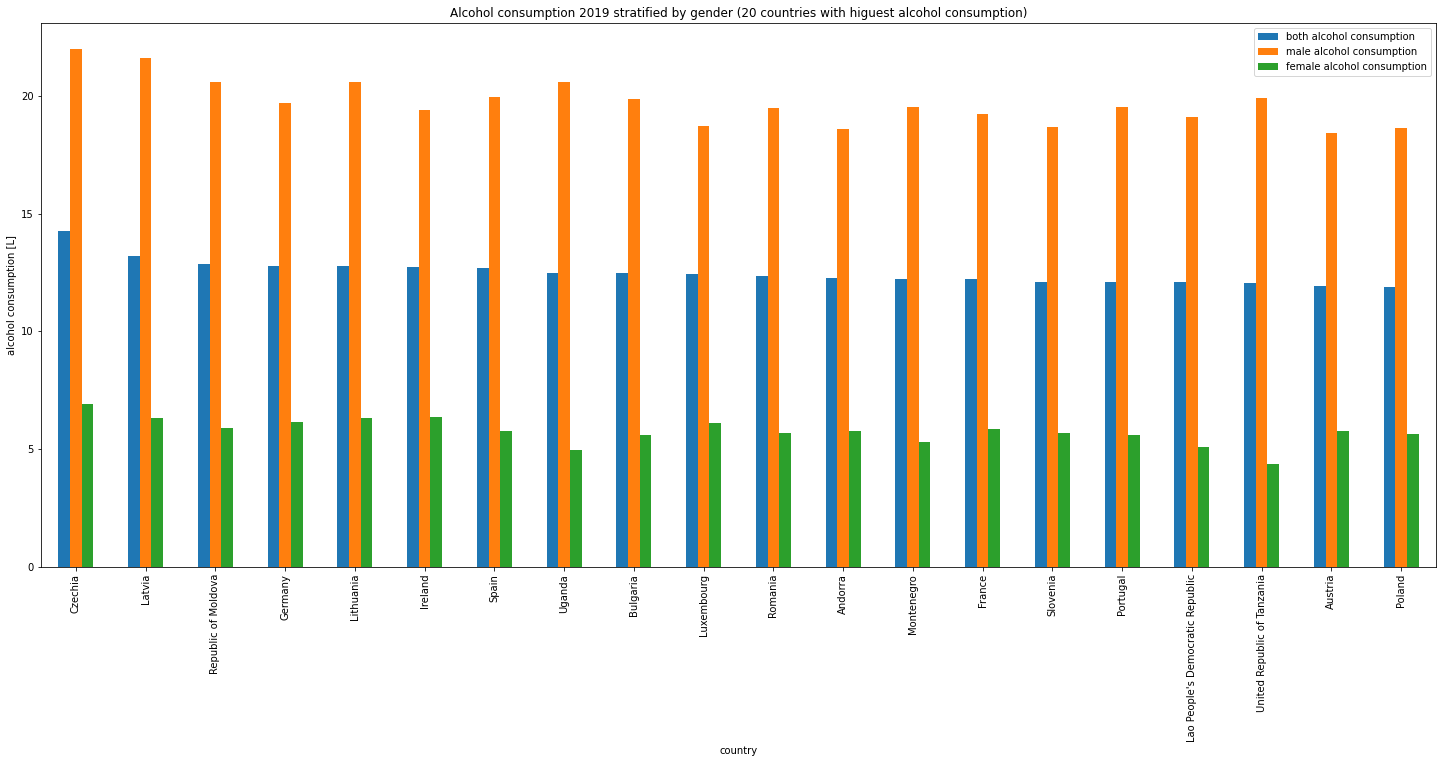

In [ ]:
df_plot_top20.plot.bar(figsize=(25, 10))
plt.title('Alcohol consumption 2019 stratified by gender (20 countries with higuest alcohol consumption)')
plt.xlabel('country')
plt.ylabel('alcohol consumption [L]')
plt.show()

In [ ]:
df_plot_last20 = df_plot[-20:]

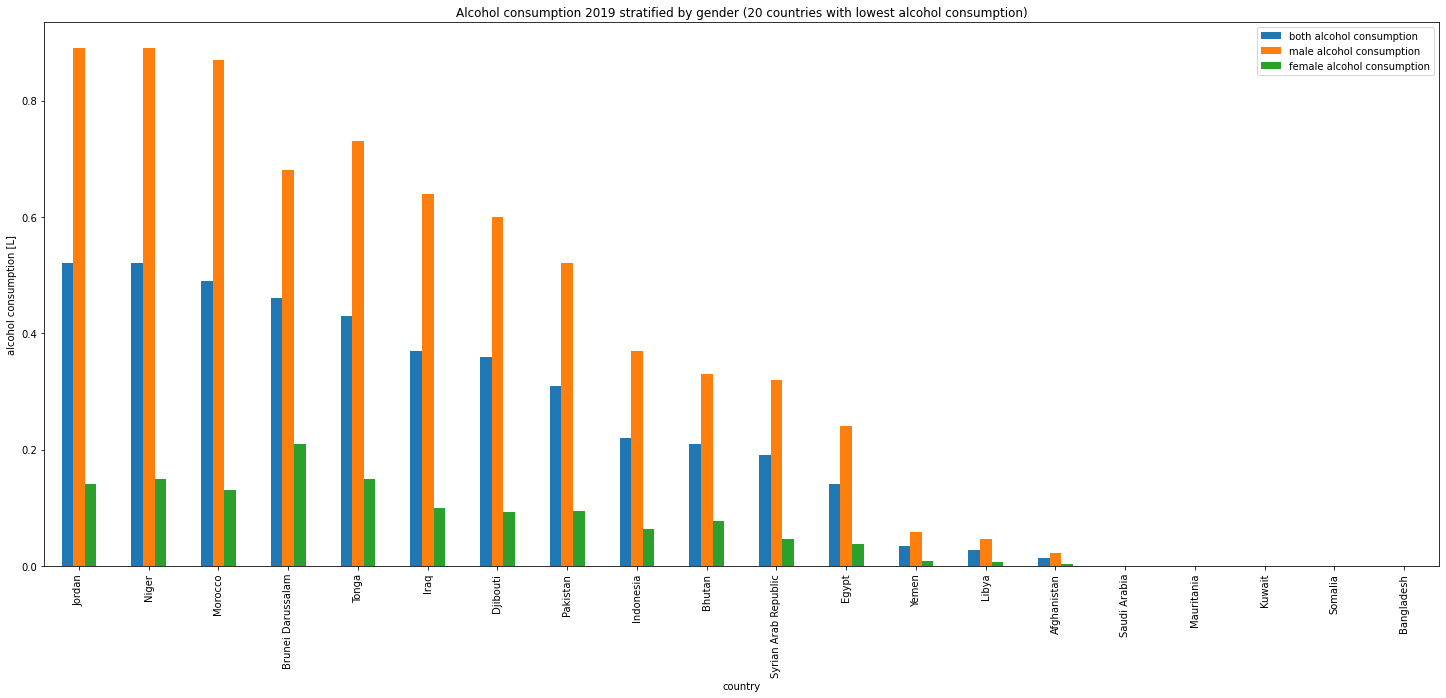

In [ ]:
df_plot_last20.plot.bar(figsize=(25, 10))
plt.title('Alcohol consumption 2019 stratified by gender (20 countries with lowest alcohol consumption)')
plt.xlabel('country')
plt.ylabel('alcohol consumption [L]')
plt.show()

In [ ]:
df_alcohol1 = df_plot
df_alcohol1

,both alcohol consumption,male alcohol consumption,female alcohol consumption
country,,,
Czechia,14.26,22.00,6.90
Latvia,13.19,21.61,6.31
Republic of Moldova,12.85,20.61,5.89
Germany,12.79,19.71,6.15
Lithuania,12.78,20.60,6.30
...,...,...,...
Saudi Arabia,0.00,0.00,0.00
Mauritania,0.00,0.00,0.00
Kuwait,0.00,0.00,0.00


#GDP

In [ ]:
DATA_PATH = '/content/drive/My Drive/Data Mining I/Project/Initial data exploration/GDP.csv' # Sergi
df = pd.read_csv(DATA_PATH, sep=';')

In [ ]:
df = df[['Unnamed: 0', 'Gross national income per capita, Atlas method']]
df = df.rename(columns={'Unnamed: 0': 'country', 'Gross national income per capita, Atlas method': 'GDP/capita'})

In [ ]:
df_plot = df[3:-4]
df_plot

,country,GDP/capita
3,Afghanistan,500.00
4,Albania,6110.00
5,Algeria,3660.00
6,American Samoa,NaN
7,Andorra,46040.00
...,...,...
221,Latin America & Caribbean,8024.00
222,Middle East & North Africa,7049.00
223,North America,68152.00
224,South Asia,2104.00


In [ ]:
df_plot = df_plot.sort_values(by ='GDP/capita', ascending=False)

In [ ]:
df_plot = df_plot.dropna() # delete missing values
df_plot

,country,GDP/capita
199,Turkiye,9830.00
195,Togo,980.00
183,St. Lucia,9680.00
81,Grenada,9630.00
68,Ethiopia,960.00
...,...,...
216,Zambia,1040.00
84,Guinea,1010.00
10,Argentina,10050.00
41,Channel Islands,..


In [ ]:
df_plot = df_plot[:-2]
df_plot['GDP/capita'] = df_plot['GDP/capita'].astype('float')
df_plot = df_plot.sort_values(by ='GDP/capita', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_gdp_male = df_plot.copy()
df_gdp_female = df_plot.copy()
df_gdp_male['gender'] = ['MLE']*len(df_gdp_male)
df_gdp_female['gender'] = ['FMLE']*len(df_gdp_female)
df_gdp2 = pd.concat([df_gdp_male, df_gdp_female], axis=0)
df_gdp2

,country,GDP/capita,gender
24,Bermuda,116540.0,MLE
189,Switzerland,90360.0,MLE
148,Norway,84090.0,MLE
96,Isle of Man,83920.0,MLE
118,Luxembourg,81110.0,MLE
...,...,...,...
3,Afghanistan,500.0,FMLE
119,Madagascar,500.0,FMLE
135,Mozambique,480.0,FMLE
177,Somalia,450.0,FMLE


In [ ]:
df_plot = df_plot.set_index('country')

In [ ]:
df_plot_top100 = df_plot[:100]

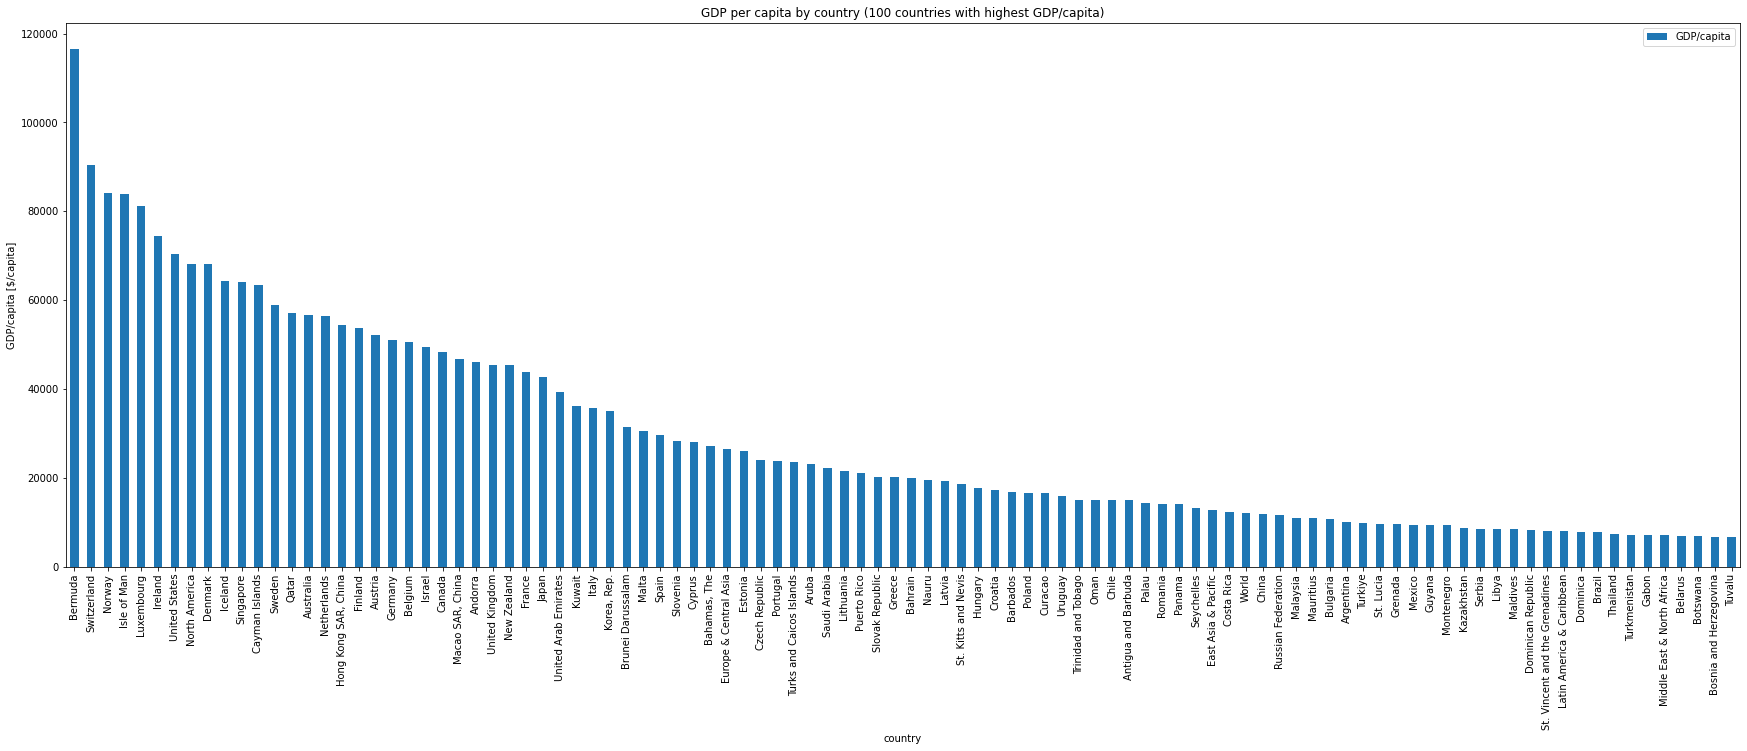

In [ ]:
df_plot_top100.plot.bar(figsize=(30, 10))
plt.title('GDP per capita by country (100 countries with highest GDP/capita)')
plt.xlabel('country')
plt.ylabel('GDP/capita [$/capita]')
plt.show()

In [ ]:
df_gdp1 = df_plot

Concatenate datasets

In [ ]:
df_final1 = pd.concat([df_suicide_by_gender1, df_pollution1, df_alcohol1, df_gdp1], axis=1)
df_final1

,both suicide rate,male suicide rate,female suicide rate,air pollution,both alcohol consumption,male alcohol consumption,female alcohol consumption,GDP/capita
country,,,,,,,,
Lesotho,87.48,146.90,34.56,24.49,5.08,8.65,1.67,1270.0
Guyana,40.85,64.97,16.96,23.14,5.33,8.57,2.10,9380.0
Eswatini,40.46,78.67,6.41,19.90,8.78,14.78,3.26,3680.0
Kiribati,30.56,53.56,9.45,11.07,2.32,3.97,0.80,2910.0
Micronesia (Federated States of),28.99,44.32,13.21,10.54,2.51,4.14,0.85,NaN
...,...,...,...,...,...,...,...,...
Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1180.0
Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140.0
"Gambia, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.0


In [ ]:
df_final1 = df_final1.dropna()
df_final1 = df_final1.drop(['male suicide rate', 'female suicide rate', 'both alcohol consumption'], axis=1)
df_final1 = df_final1[['air pollution', 'male alcohol consumption', 'female alcohol consumption', 'GDP/capita', 'both suicide rate']]
df_final1

,air pollution,male alcohol consumption,female alcohol consumption,GDP/capita,both suicide rate
country,,,,,
Lesotho,24.49,8.65,1.67,1270.0,87.48
Guyana,23.14,8.57,2.10,9380.0,40.85
Eswatini,19.90,14.78,3.26,3680.0,40.46
Kiribati,11.07,3.97,0.80,2910.0,30.56
Suriname,26.48,11.74,3.10,4440.0,25.89
...,...,...,...,...,...
Sao Tome and Principe,39.00,9.15,2.49,2280.0,2.20
Jordan,33.20,0.89,0.14,4480.0,1.98
Grenada,22.87,14.25,3.64,9630.0,0.64


In [ ]:
df_final2 = pd.merge(df_suicide_by_gender2, df_pollution2, how='inner', on=['country', 'gender'])
df_final2 = pd.merge(df_final2, df_alcohol2, how='inner', on=['country', 'gender'])
df_final2 = pd.merge(df_final2, df_gdp2, how='inner', on=['country', 'gender'])
df_final2

,country,gender,suicide rate,air pollution,alcohol consumption,GDP/capita
0,Antigua and Barbuda,MLE,0.00,21.03,15.09,14900.0
1,Barbados,FMLE,0.16,24.82,4.35,16720.0
2,Barbados,MLE,0.49,24.82,16.95,16720.0
3,Grenada,MLE,0.53,22.87,14.25,9630.0
4,Antigua and Barbuda,FMLE,0.60,21.03,4.25,14900.0
...,...,...,...,...,...,...
299,Liberia,MLE,9.40,52.28,8.58,620.0
300,Turkmenistan,MLE,9.41,18.24,5.26,7220.0
301,Kiribati,FMLE,9.45,11.07,0.80,2910.0
302,South Africa,FMLE,9.83,25.15,3.46,6440.0


In [ ]:
df_final2 = df_final2.dropna()
df_final2 = df_final2[['country', 'gender', 'air pollution', 'alcohol consumption', 'GDP/capita', 'suicide rate']]
df_final2

,country,gender,air pollution,alcohol consumption,GDP/capita,suicide rate
0,Antigua and Barbuda,MLE,21.03,15.09,14900.0,0.00
1,Barbados,FMLE,24.82,4.35,16720.0,0.16
2,Barbados,MLE,24.82,16.95,16720.0,0.49
3,Grenada,MLE,22.87,14.25,9630.0,0.53
4,Antigua and Barbuda,FMLE,21.03,4.25,14900.0,0.60
...,...,...,...,...,...,...
299,Liberia,MLE,52.28,8.58,620.0,9.40
300,Turkmenistan,MLE,18.24,5.26,7220.0,9.41
301,Kiribati,FMLE,11.07,0.80,2910.0,9.45
302,South Africa,FMLE,25.15,3.46,6440.0,9.83


In [ ]:
df_final1.to_csv('final_data1.csv')
df_final2.to_csv('final_data2.csv')